In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import cv2
import os
import tensorflow as tf
import keras as keras
from keras import utils
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers import Adam

2024-07-03 08:54:08.559570: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 08:54:08.559763: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 08:54:08.719173: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data_dir= '/kaggle/input/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification'

# **Creating the test and train dataset**

In [3]:
# train data
# Tensorflow data dataset object  created using TensorFlow's
# image_dataset_from_directory function from the utils module,
# which generates a dataset from image files organized in directories.
# Type: TensorFlow Dataset
# Purpose: It contains batches of images and their corresponding labels for training a machine learning model.
# Characteristics: It is iterable and provides batches of data (x, images and y, labels) for training purposes.
# Each element in the dataset is a tuple (x, y) where x is a batch of preprocessed images (tensors) and y
# is a batch of corresponding labels (integers or categorical).

train_data=utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)



Found 1129 files belonging to 10 classes.
Using 1017 files for training.


In [4]:
# validation data
vald_data=utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)


Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [5]:
print(train_data)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [6]:
# take a single batch of images
for images,lables in train_data.take(1):
  print(images.shape)
  print(lables.shape)

(64, 256, 256, 3)
(64,)


In [7]:
print(vald_data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
for images,lables in vald_data.take(1):
  print(images.shape)
  print(lables.shape)

(64, 256, 256, 3)
(64,)


# **Pre-Process**

In [9]:
print(type(train_data))


<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [10]:
classes=train_data.class_names
print(classes)

['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [11]:
# preprocessing is an important step as it involves the normilization of images
def normalize(image, label):
  return image/255.0, label

train_data = train_data.map(normalize)

In [12]:

vald_data= vald_data.map(normalize)

In [13]:
for img, label in train_data.take(1):
  print(type(img),type(label))
  # print(img,label)

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


# **Test and Train**

In [14]:
train_x=[]
train_y=[]
for image,label in train_data:
   train_x.append(image)
   train_y.append(label)
   print(type(train_y))
train_x = tf.concat(train_x, axis=0)
train_y = tf.concat(train_y, axis=0)



<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [15]:
print(train_y)
type(train_y)

tf.Tensor([9 2 5 ... 8 3 2], shape=(1017,), dtype=int32)


tensorflow.python.framework.ops.EagerTensor

In [16]:
train_x

<tf.Tensor: shape=(1017, 256, 256, 3), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.       

In [17]:
val_x=[]
val_y=[]
for image,label in train_data:
   val_x.append(image)
   val_y.append(label)
val_x = tf.concat(val_x, axis=0)
val_y = tf.concat(val_y, axis=0)

In [18]:
type(train_x)

tensorflow.python.framework.ops.EagerTensor

In [19]:
type(train_y)

tensorflow.python.framework.ops.EagerTensor

In [20]:
#one hot encode
num_classes = 10
train_y = tf.keras.utils.to_categorical(train_y, num_classes=num_classes)
val_y = tf.keras.utils.to_categorical(val_y, num_classes=num_classes)

# **Plot**

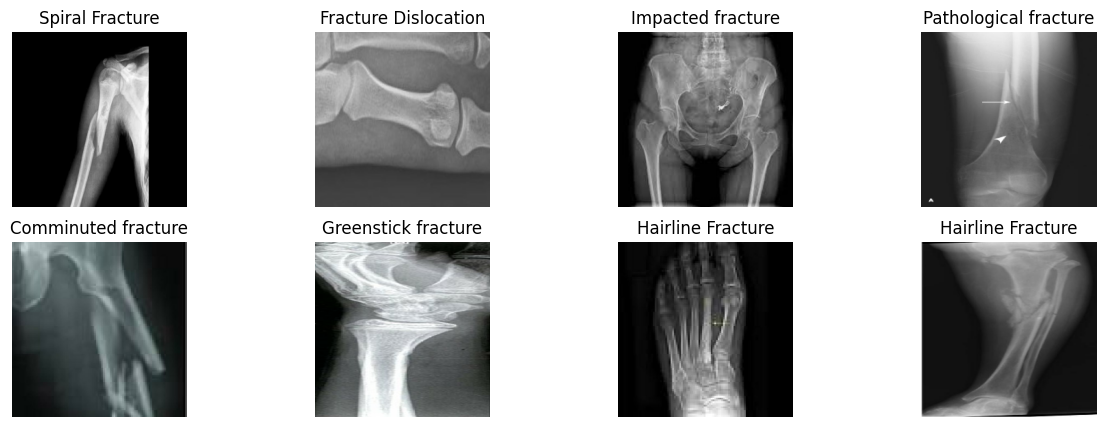

In [21]:
class_labels=["Avulsion fracture","Comminuted fracture","Fracture Dislocation","Greenstick fracture",
              "Hairline Fracture","Impacted fracture","Longitudinal fracture","Oblique fracture",
              "Pathological fracture","Spiral Fracture"]
# Initialize the figure and subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

# Iterate through the first 10 images
for i, ax in enumerate(axes.flat):
    # Select the image and label
    image, label = train_x[i], train_y[i]

    # Display the image
    ax.imshow(image, cmap='gray')

    # Set the title with the class label
    ax.set_title(f"{class_labels[np.argmax(label)]}")
    ax.axis('off')

# Display the figure
plt.show()

# **Model**

In [40]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(60, (3, 3), activation='relu', input_shape=(256, 256, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(120, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 60)   │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 60)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 120)  │        64,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 461280)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 40)             │    18,451,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,518,250 (70.64 MB)

 Trainable params: 18,518,250 (70.64 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [43]:
# Train the model
model.fit(train_x, train_y, batch_size=10, epochs=5,
          validation_data=(val_x,val_y))

Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.1282 - loss: 3.8026 - val_accuracy: 0.2134 - val_loss: 2.2750
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.2190 - loss: 2.2341 - val_accuracy: 0.4523 - val_loss: 1.9816
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.4483 - loss: 1.6885 - val_accuracy: 0.7709 - val_loss: 1.0249
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.7470 - loss: 0.8669 - val_accuracy: 0.8948 - val_loss: 0.4075
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.8909 - loss: 0.4539 - val_accuracy: 0.9784 - val_loss: 0.2229


In [44]:
# Evaluate the model
loss, accuracy = model.evaluate(val_x,val_y)
print('Test accuracy:', accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9807 - loss: 0.1995
Test accuracy: 0.9783677458763123


In [45]:
pred = model.predict(val_x)
print(pred)


32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step
[[2.1547505e-08 2.3370370e-16 3.2221679e-09 ... 9.9999982e-01
  1.0830208e-14 1.9589525e-13]
 [2.0378310e-02 8.2769573e-01 1.5477318e-02 ... 2.7512779e-02
  1.2774136e-03 3.1647898e-02]
 [1.8550784e-16 5.3383437e-22 1.2862507e-23 ... 2.6503804e-18
  9.9999994e-01 2.1889600e-18]
 ...
 [1.4640174e-04 1.0815596e-04 3.1642109e-04 ... 3.4843537e-04
  2.2003319e-06 8.9874794e-04]
 [7.9921000e-03 6.5311225e-04 1.7578965e-03 ... 5.0275604e-04
  9.8197043e-01 6.4748077e-04]
 [1.2566411e-01 1.2182862e-02 7.3426491e-01 ... 1.8724442e-02
  4.8621842e-03 4.7684912e-04]]


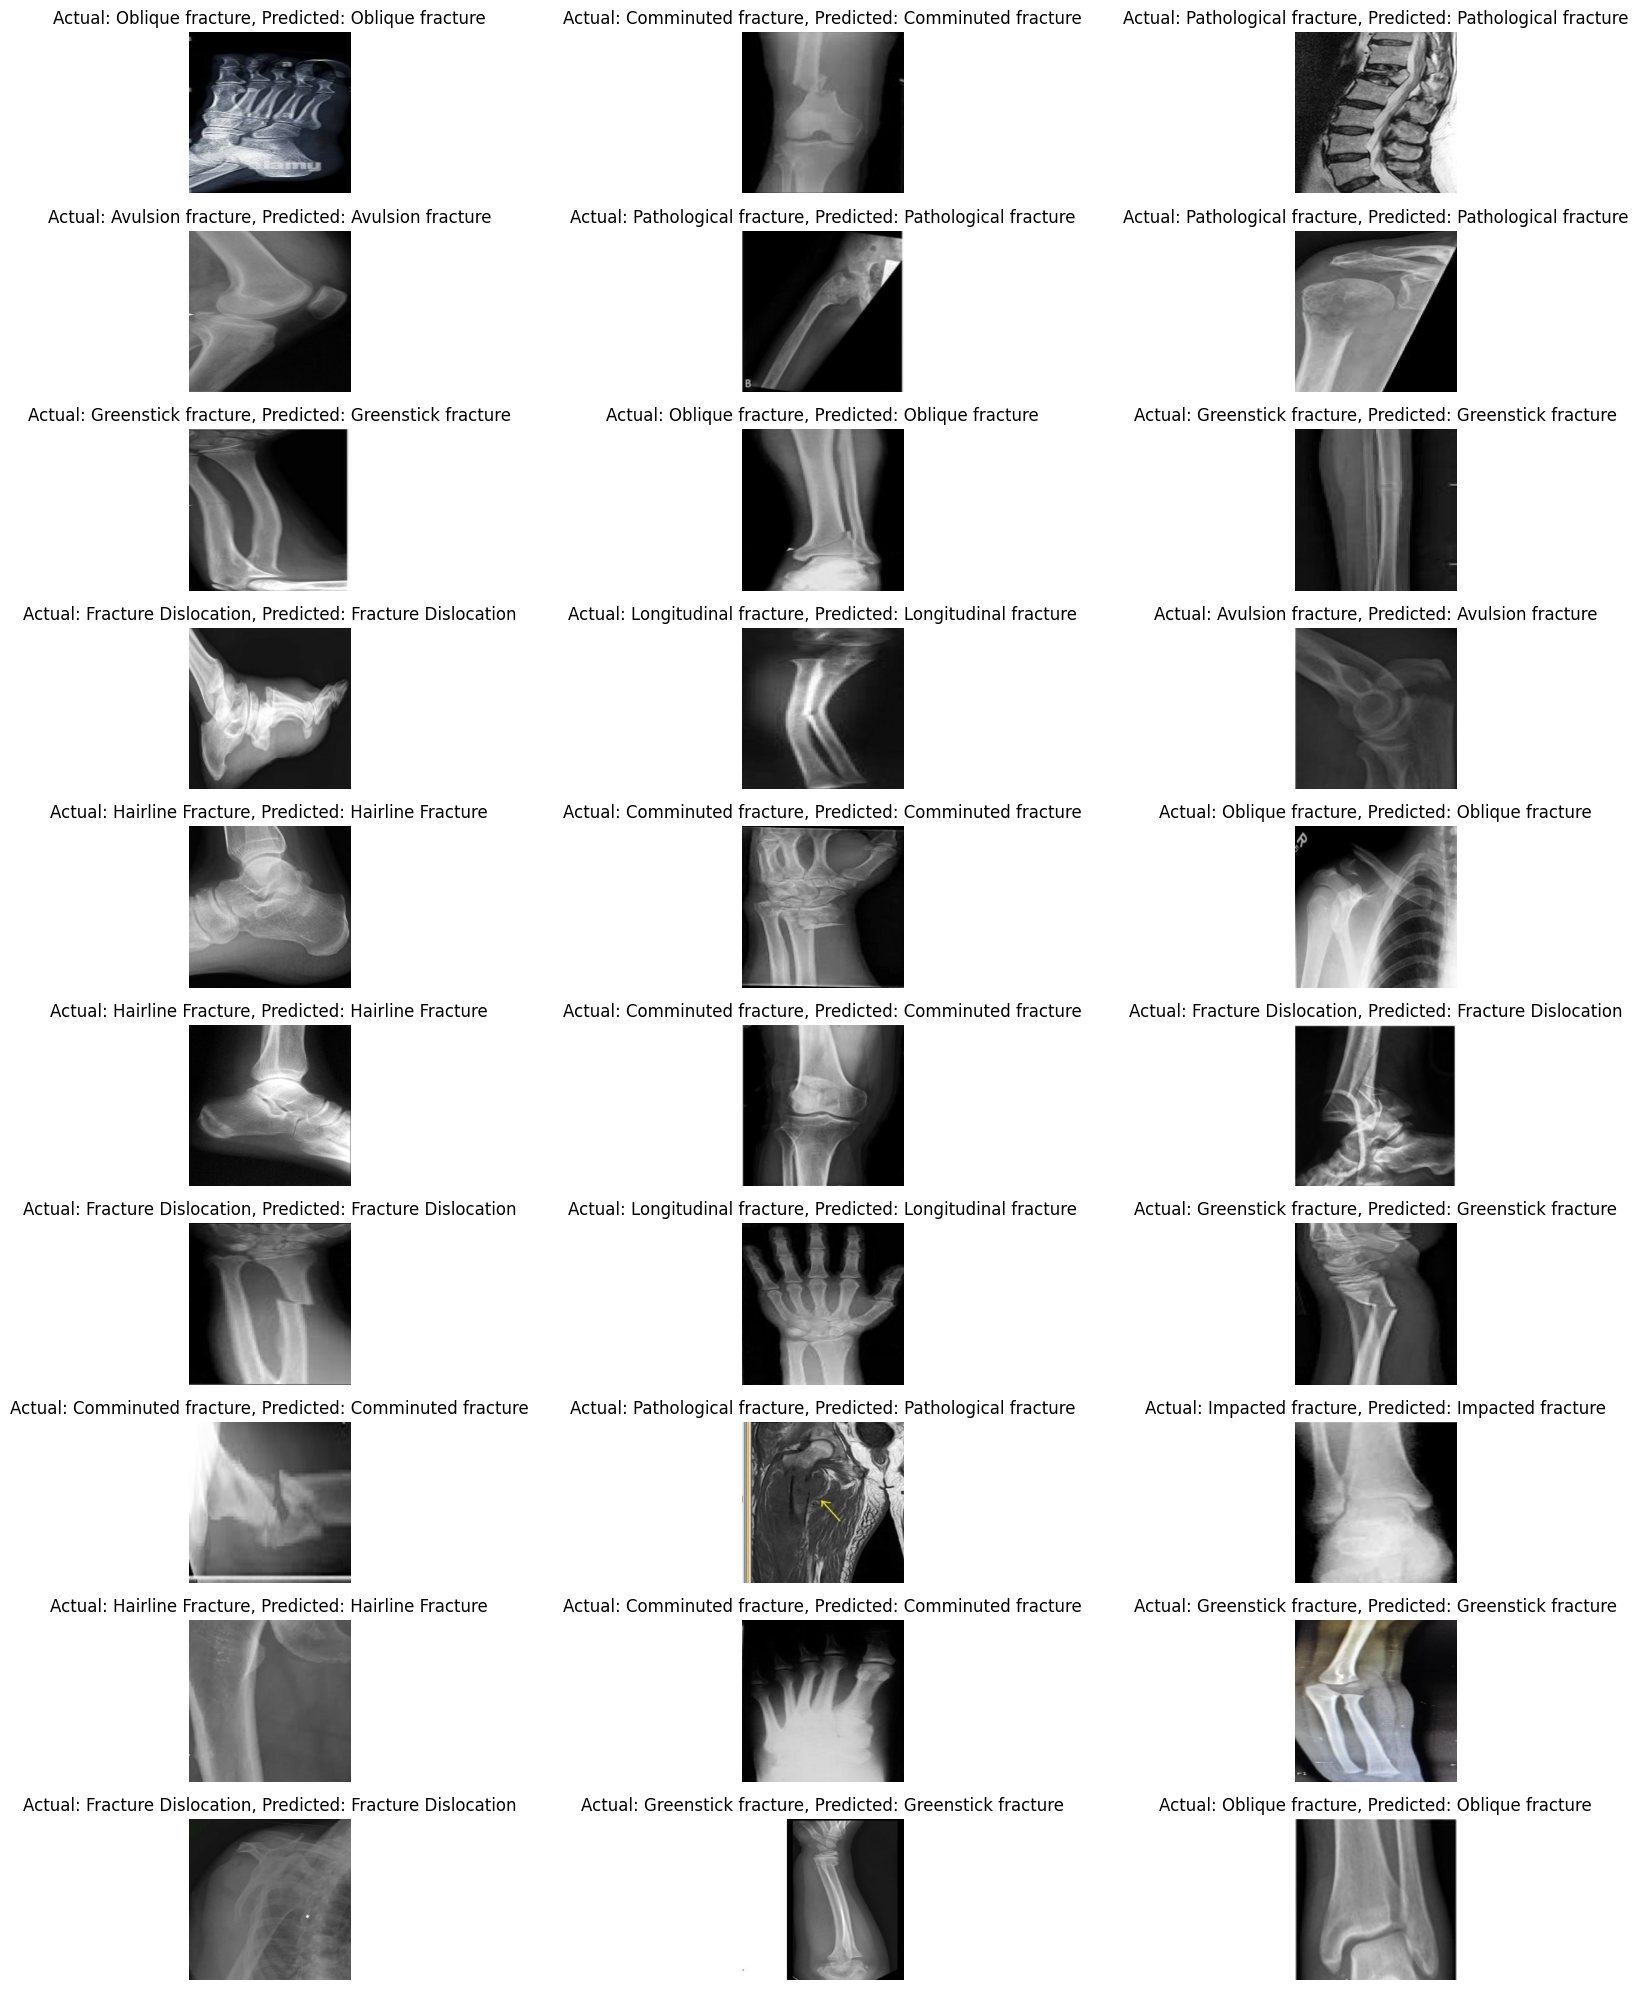

In [46]:
num_images_to_display = 30
num_columns = 3
num_rows = (num_images_to_display + num_columns - 1) 

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        ax.imshow(val_x[i])
        actual_label = class_labels[np.argmax(val_y[i])]
        predicted_label = class_labels[np.argmax(pred[i])]
        ax.set_title(f"Actual: {actual_label}, Predicted: {predicted_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
